# Path Generator (Min)

## Modules

In [1]:
import sys
sys.path.append('../modules')
import random

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd

import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import seaborn as sns
sns.set(style="whitegrid")

from pyspark import SparkContext, SparkConf

ModuleNotFoundError: No module named 'pyspark'

## Function

In [2]:
def generateAngleMin(angleNumber, beamWidth):
    angle = []
    lowerBound = -beamWidth / 2
    upperBound = beamWidth
    for i in range(1, angleNumber + 1):
        toAdd = random.uniform(lowerBound, upperBound)
        if i % 2 == 0:
            angle.append(toAdd)
        else:
            angle.append(toAdd + 180)
    return angle


def cosDifference(angle1, angle2):
    cosDiff = np.cos(np.deg2rad(angle1 - angle2))
    return cosDiff


def angularValue(angleArray):
    totalCos = 0
    index = 1
    for i in angleArray:
        for j in angleArray[index:]:
            totalCos += cosDifference(i, j)
        index += 1
    return totalCos


def generateChannelCoefficient(pathNumber, pathCoefficient, angleArray):
    channelCoeff = np.square(pathCoefficient) * (
        pathNumber + (2 * angularValue(angleArray)))
    return channelCoeff

## Variables

In [3]:
beamWidth = 20
pathCoefficient = 1
pathNumber = 1000
baseChannelCoefficient = np.arange(1, pathNumber + 1)
pathRange = np.arange(1, pathNumber + 1)
fileName = 'channelc_min_' + str(beamWidth) + '.csv'

In [4]:
ls

channelc_max_10.csv  channelc_max_5.csv   channelc_min_5.csv
channelc_max_20.csv  channelc_min_10.csv  pathGeneratorMax.ipynb
channelc_max_30.csv  channelc_min_30.csv  pathGeneratorMin.ipynb


## Generate Paths

In [5]:
if __name__ == '__main__':
    sc.stop()
    
    conf = SparkConf().setAppName('generatorMin').setMaster('local[*]')
    sc = SparkContext(conf=conf)

    channel = baseChannelCoefficient
    channel = sc.parallelize(channel)

    channel = channel.map(lambda ch: generateAngleMin(ch, beamWidth))
    channel = channel.map(lambda ch: generateChannelCoefficient(len(ch), pathCoefficient, ch))

In [6]:
channel.take(5)

[1,
 0.00015461554767859376,
 1.136717694500316,
 0.23239015885465264,
 0.9999448892604175]

In [7]:
# channelData is the channel coefficient value for each N paths
channelData = channel.collect()

## Exporting Paths to .csv File

In [8]:
np.savetxt(fileName, channelData, delimiter=';', fmt='%f')

In [9]:
# it is the previously saved channelData
importedData = np.loadtxt(fileName)

In [10]:
importedData

array([  1.      ,   0.000155,   1.136718,   0.23239 ,   0.999945,
         0.076187,   1.123433,   0.519247,   1.100777,   0.166601,
         1.04515 ,   0.106585,   1.476525,   0.78715 ,   1.219027,
         1.00896 ,   1.021018,   0.001956,   1.134614,   0.012952,
         4.100563,   0.055558,   1.525953,   0.081462,   1.086483,
         0.704947,   1.264108,   0.091389,   2.996626,   0.115187,
         0.909136,   0.010595,   1.822268,   0.026555,   2.324737,
         1.197108,   0.9662  ,   0.552246,   1.450433,   0.372195,
         1.138512,   0.564397,   1.005808,   0.827705,   1.599189,
         0.958816,   1.231331,   0.008728,   1.167797,   1.8     ,
         2.944835,   0.635288,   2.114033,   2.408986,   1.091847,
         0.004067,   2.770019,   0.003742,   7.043554,   0.039442,
         1.650763,   0.821194,   1.291392,   0.061825,   0.990672,
         0.025758,   0.82057 ,   0.700337,   1.369598,   3.843934,
         1.024541,   0.199466,   1.777635,   0.026668,   2.032

## Plot Test

In [14]:
ls

channelc_max_10.csv  channelc_min_10.csv  pathGeneratorMax.ipynb
channelc_max_20.csv  channelc_min_20.csv  pathGeneratorMin.ipynb
channelc_max_30.csv  channelc_min_30.csv
channelc_max_5.csv   channelc_min_5.csv


In [17]:
y5 = np.loadtxt('channelc_min_5.csv')
y10 = np.loadtxt('channelc_min_10.csv')
y20 = np.loadtxt('channelc_min_20.csv')
y30 = np.loadtxt('channelc_min_30.csv')

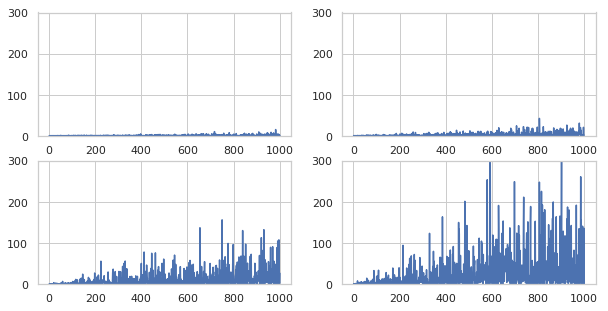

In [18]:
fig = plt.figure(figsize=[10, 5])
paths = np.arange(1, pathNumber + 1)

ax = fig.add_subplot(221)
# ax.plot(baseChannelCoefficient, y5)
sns.lineplot(x=paths, y=y5)
plt.ylim(0, 300)

bx = fig.add_subplot(222)
# bx.plot(baseChannelCoefficient, y30)
sns.lineplot(x=paths, y=y10)
plt.ylim(0, 300)

cx = fig.add_subplot(223)
# bx.plot(baseChannelCoefficient, y30)
sns.lineplot(x=paths, y=y20)
plt.ylim(0, 300)

dx = fig.add_subplot(224)
# bx.plot(baseChannelCoefficient, y30)
sns.lineplot(x=paths, y=y30)
plt.ylim(0, 300)

plt.show()

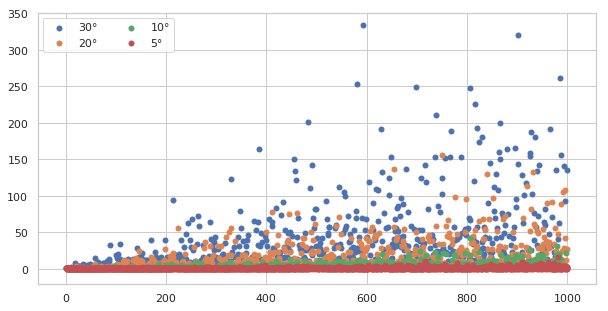

In [34]:
fig = plt.figure(figsize=[10, 5])
paths = np.arange(1, pathNumber + 1)

sns.scatterplot(x=paths, y=y30, linewidth=0)
sns.scatterplot(x=paths, y=y20, linewidth=0)
sns.scatterplot(x=paths, y=y10, linewidth=0)
sns.scatterplot(x=paths, y=y5, linewidth=0)

plt.legend(['30°','20°','10°','5°'], ncol=2, loc='upper left');
plt.show()